In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
ess = pd.read_csv("/Users/Jenny/Documents/Thinkful/random downloaded data/european_social_survey.csv")
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


C:\Users\Jenny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


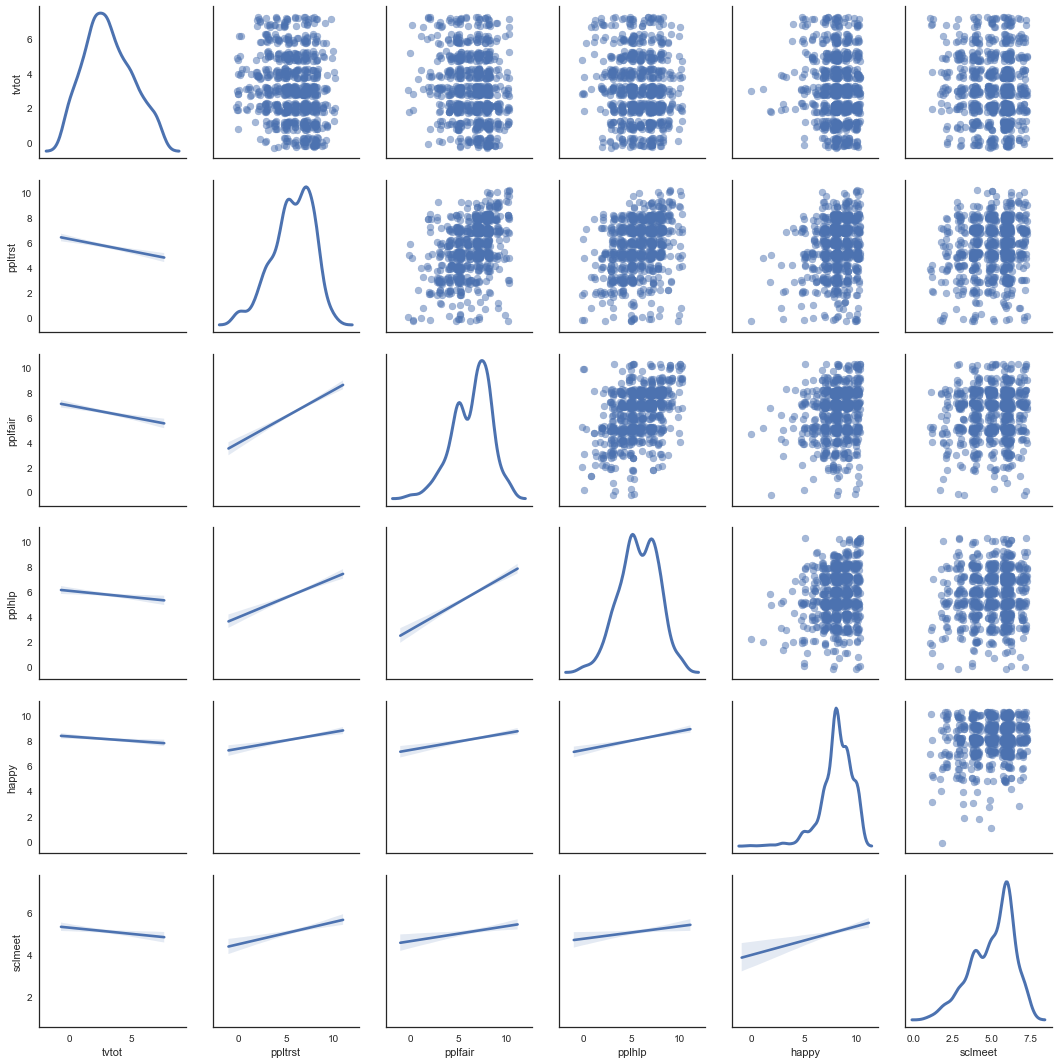

In [4]:
#for two continuous variables:
#scatterplot reps. relationship bw vars
#correlation coeff., r, reps linear relationship [-1, 1]
#look for 2d outliers that rep. unusual combos of values

sns.set_style("white")

df_czch = ess.loc[
    ((ess['cntry'] == 'CZ') | (ess['cntry'] == 'CH')) & (ess['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

#copying data to add jitter & then plot
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()

jitter = pd.DataFrame(
    np.random.uniform(-0.3, 0.3, size=(df_jittered.shape)),
    columns = df_jittered.columns
)

#combining the data and the noise
df_jittered = df_jittered.add(jitter)

#declaring scatterplot and matrix and forming it:
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot, scatter_kws = dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


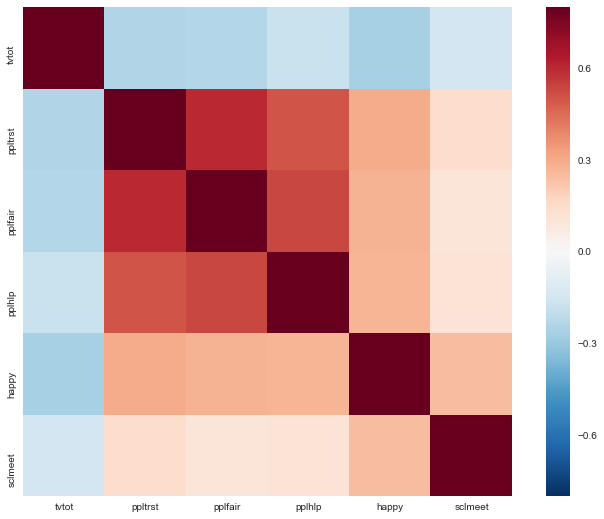

In [6]:
#make a correlation matrix:
corrmat = df_czch.corr()
print(corrmat)

#setting up the plt figure:
f, ax = plt.subplots(figsize=(12, 9))

#draw the heatmap with sns
sns.heatmap(corrmat, vmax=0.8, square = True)
plt.show()

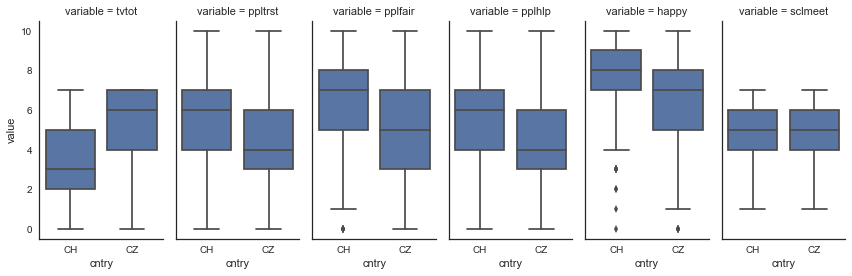

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.3215763985820789e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.3940290175498276e-27)
pplfair
Ttest_ind

In [10]:
#for a continuous and categorical pair:
#box, violin, similar est. value of cont. var for ea val on cat var
#descriptive stats -- c'tral tend, variance
#ttests, anova
#look for: outliers, small groups

#plot all vars with boxplts for ea country
#restructure so we can use facetgrid instead of bxplt

df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=0.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

#descriptive stats by group:
print(df_czch.groupby('cntry').describe())

#test weather group diffs are sig
for col in df_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

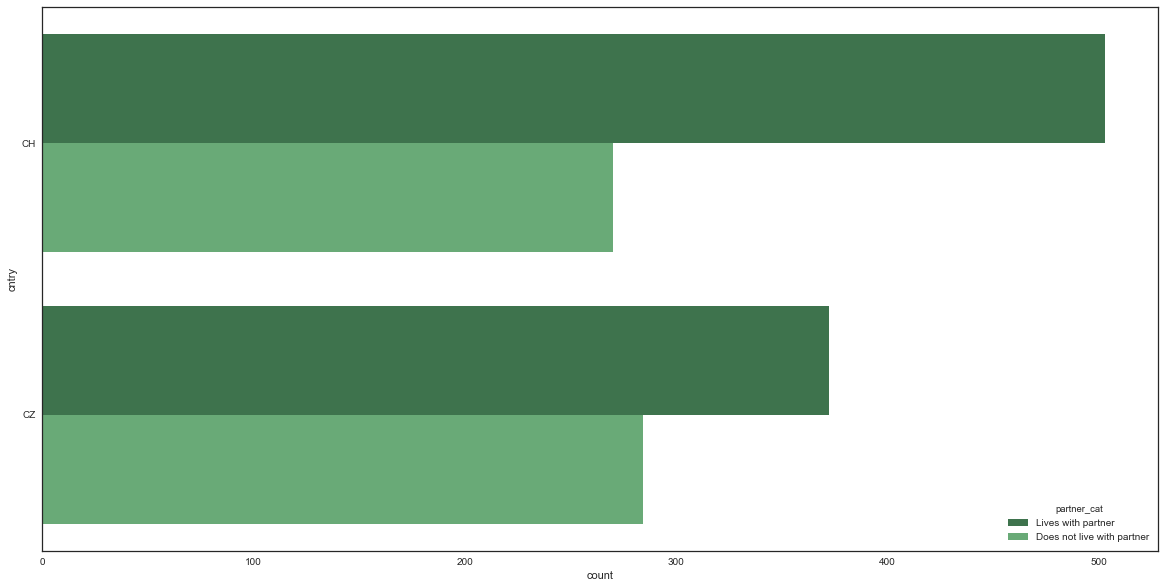

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.399580125962217, pvalue=9.2365935866454386e-21)


In [16]:
#for two cat vars:
#barplot, with height indicating number datapoints
#table of counts, giving num. of data points
#chi sqr tests, indicate whether one combo of levels is sig.
#look for: sub groups with very small counts

#add a second cat var:
df_2cat = ess.loc[
    ((ess['cntry'] == 'CZ') | (ess['cntry'] == 'CH')) & (ess['year'] == 6),
    ['cntry','partner']
]


#create a text variable so output is more user-friendly
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

#plot counts for each combo of lvls
sns.countplot(y = "cntry", hue = "partner_cat", data = df_2cat, palette = "Greens_d")
plt.show()

#table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

#chi-square
print(stats.chisquare(counttable, axis = None))